In [3]:
!pip3 install matplotlib numpy sympy
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_241802/2615232415.py:152: RuntimeWarning: invalid value encountered in divide
  return (self.apos - self.prev.apos) / self.delta
/tmp/ipykernel_241802/2615232415.py:228: RuntimeWarning: invalid value encountered in divide
  return (self.bpos - self.prev.bpos) / self.delta
/tmp/ipykernel_241802/2615232415.py:291: RuntimeWarning: invalid value encountered in divide
  return (self.cpos - self.prev.cpos) / self.delta
/tmp/ipykernel_241802/2615232415.py:318: RuntimeWarning: invalid value encountered in divide
  return (self.dpos - self.prev.dpos) / self.delta
/tmp/ipykernel_241802/2615232415.py:335: RuntimeWarning: invalid value encountered in divide
  return (self.epos - self.prev.epos) / self.delta
/tmp/ipykernel_241802/2615232415.py:362: RuntimeWarning: invalid value encountered in divide
  return (self.fpos - self.pre

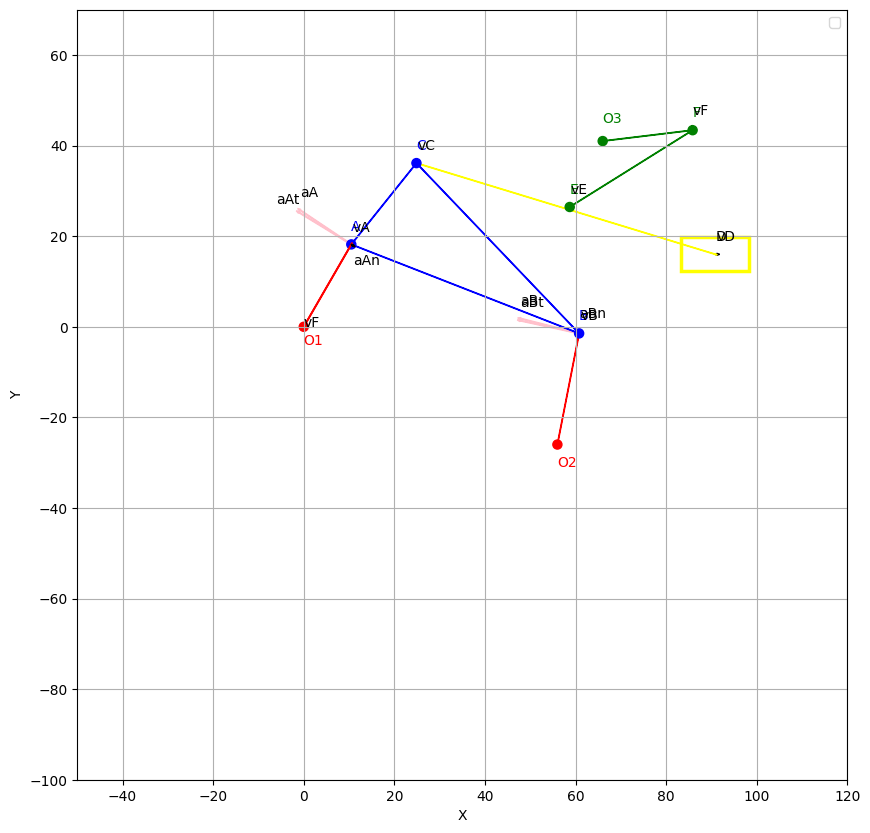

In [12]:
# create a plot
from dataclasses import InitVar, dataclass
from typing import Dict, Optional
from matplotlib.animation import FuncAnimation
import matplotlib.patches as patches

FPS = 30  # increase to make animation slower


phi0 = np.pi / 3
phi1 = np.pi / 3 + np.pi * 2
frames = int((phi1 - phi0) * FPS)


class NoSolution(Exception):
    pass


def phi(i):
    return phi0 + i / FPS


fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(-50, 120)
ax.set_xlabel("X")
ax.set_ylim(-100, 70)
ax.set_ylabel("Y")
ax.grid()
ax.set_aspect("equal")

a, b, c, d, e, O1A, O2B, O3F, AB, BC, CD, CE, EF = (
    56,
    10,
    26,
    16,
    25,
    21,
    25,
    20,
    54,
    52,
    69,
    35,
    32,
)
AC = CD / 3
w = 2


ACTORS: Dict[str, patches.Arrow] = {
    "O1": patches.Circle((0, 0), 1, color="red"),
    "O1label": ax.text(0, -4, "O1", color="red"),
    "O2": patches.Circle((a, -c), 1, color="red"),
    "O2label": ax.text(a, -c - 5, "O2", color="red"),
    "A": patches.Circle((a, 0), 1, color="blue"),
    "Alabel": ax.text(a, 0, "A", color="blue"),
    "vA": ax.arrow(0, 0, 0, 0, color="black", width=0.15),
    "vAlabel": ax.text(0, 0, "vA", color="black"),
    "aA": ax.arrow(0, 0, 0, 0, color="pink", width=0.15),
    "aAlabel": ax.text(0, 0, "aA", color="black"),
    "aAt": ax.arrow(0, 0, 0, 0, color="pink", width=0.15),
    "aAtlabel": ax.text(0, 0, "aAt", color="black"),
    "aAn": ax.arrow(0, 0, 0, 0, color="pink", width=0.15),
    "aAnlabel": ax.text(0, 0, "aAn", color="black"),
    "B": patches.Circle((0, 0), 1, color="blue"),
    "Blabel": ax.text(0, 0, "B", color="blue"),
    "vB": ax.arrow(0, 0, 0, 0, color="black", width=0.15),
    "vBlabel": ax.text(0, 0, "vB", color="black"),
    "aB": ax.arrow(0, 0, 0, 0, color="pink", width=0.15),
    "aBlabel": ax.text(0, 0, "aB", color="black"),
    "aBt": ax.arrow(0, 0, 0, 0, color="pink", width=0.15),
    "aBtlabel": ax.text(0, 0, "aBt", color="black"),
    "aBn": ax.arrow(0, 0, 0, 0, color="pink", width=0.15),
    "aBnlabel": ax.text(0, 0, "aBn", color="black"),
    "O1A": ax.arrow(0, 0, O1A, 0, color="red", width=0.1),
    "O2B": ax.arrow(a, -c, O2B, 0, color="red", width=0.1),
    "AB": ax.arrow(0, 0, AB, 0, color="blue", width=0.1),
    "O3": patches.Circle((a + b, d + e), 1, color="green"),
    "O3label": ax.text(a + b, d + e + 4, "O3", color="green"),
    "vF": ax.arrow(0, 0, 0, 0, color="black", width=0.15),
    "vFlabel": ax.text(0, 0, "vF", color="black"),
    "C": patches.Circle((a, 0), 1, color="blue"),
    "Clabel": ax.text(a, 0, "C", color="blue"),
    "vC": ax.arrow(0, 0, 0, 0, color="black", width=0.15),
    "vClabel": ax.text(0, 0, "vC", color="black"),
    "D": patches.Rectangle((a, 0), 15, 7.5, color="yellow", fill=False, linewidth=2.5),
    "Dlabel": ax.text(a + 7.5, 3.75, "D", color="black"),
    "vD": ax.arrow(0, 0, 0, 0, color="black", width=0.15),
    "vDlabel": ax.text(0, 0, "vD", color="black"),
    "BC": ax.arrow(0, 0, 0, 0, color="blue", width=0.1),
    "AC": ax.arrow(a, 0, 0, 0, color="blue", width=0.1),
    "CD": ax.arrow(a, 0, 0, 0, color="yellow", width=0.1),
    "E": patches.Circle((a + b, c + d), 1, color="green"),
    "Elabel": ax.text(a + b, c + d, "E", color="green"),
    "vE": ax.arrow(0, 0, 0, 0, color="black", width=0.15),
    "vElabel": ax.text(0, 0, "vE", color="black"),
    "F": patches.Circle((a + b, c + d), 1, color="green"),
    "Flabel": ax.text(a + b, d + e, "F", color="green"),
    "vF": ax.arrow(0, 0, 0, 0, color="black", width=0.15),
    "vFlabel": ax.text(0, 0, "vF", color="black"),
    "EF": ax.arrow(a + b, c + d, 0, 0, color="green", width=0.1),
    "O3F": ax.arrow(a + b, d + e, 0, 0, color="green", width=0.1),
    "info": ax.text(60, -90, "", fontsize=10),
}
ax.add_patch(ACTORS["O1"])
ax.add_patch(ACTORS["A"])
ax.add_patch(ACTORS["O1A"])
ax.add_patch(ACTORS["vA"])
ax.add_patch(ACTORS["O2"])
ax.add_patch(ACTORS["B"])
ax.add_patch(ACTORS["O3"])
ax.add_patch(ACTORS["C"])
ax.add_patch(ACTORS["D"])
ax.add_patch(ACTORS["E"])
ax.add_patch(ACTORS["F"])


@dataclass
class State:
    phi: float
    prev: Optional["State"] = None

    _apos: Optional[np.array] = None
    _avel: Optional[np.array] = None
    _bpos: Optional[np.array] = None
    _cpos: Optional[np.array] = None
    _dpos: Optional[np.array] = None
    _epos: Optional[np.array] = None
    _fpos: Optional[np.array] = None

    def __post_init__(self):
        self.delta = (self.phi - self.prev.phi) / w if self.prev else 0

    @property
    def apos(self):
        if self._apos is not None:
            return self._apos

        self._apos = np.array([O1A * np.cos(self.phi), O1A * np.sin(self.phi), 0])
        return self._apos

    @property
    def avel(self):
        if not self.prev:
            return np.array([0, 0, 0])

        try:
            self.cpos
        except NoSolution:
            return np.array([0, 0, 0])

        return (self.apos - self.prev.apos) / self.delta

    @property
    def aacc(self):
        if not self.prev:
            return np.array([0, 0, 0])

        try:
            self.cpos
        except NoSolution:
            return np.array([0, 0, 0])

        return (self.avel - self.prev.avel) / self.delta

    @property
    def aacct(self):
        if not self.prev:
            return np.array([0, 0, 0])

        try:
            self.cpos
        except NoSolution:
            return np.array([0, 0, 0])

        return (
            (self.aacc.dot(self.avel) / np.linalg.norm(self.avel))
            * self.avel
            / np.linalg.norm(self.avel)
        )

    @property
    def aaccn(self):
        return self.aacc - self.aacct

    @property
    def O1A_ang_vel(self):
        return w

    @property
    def O1A_ang_vel2(self):
        return np.linalg.norm(self.avel) / np.linalg.norm(self.apos)

    @property
    def bpos(self):
        if self._bpos is not None:
            return self._bpos

        c1 = sp.Circle(sp.Point(*self.apos[:2]), AB)
        c2 = sp.Circle(sp.Point(a, -c), O2B)

        point = None

        if self.phi > 0:
            maxx = -np.inf

            ints = c1.intersection(c2)
            for i in ints:
                p = i.evalf()
                if p.x > maxx:
                    maxx = p.x
                    point = p
        else:
            ints = c1.intersection(c2)
            point = ints[0]

        if len(ints) == 0:
            raise NoSolution(f"No intersection, {self.phi}")

        self._bpos = np.array([float(point.x), float(point.y), 0])
        return self._bpos

    @property
    def bvel(self):
        if not self.prev:
            return np.array([0, 0, 0])

        return (self.bpos - self.prev.bpos) / self.delta

    @property
    def bacc(self):
        if not self.prev:
            return np.array([0, 0, 0])

        return (self.bvel - self.prev.bvel) / self.delta

    @property
    def bacct(self):
        if not self.prev:
            return np.array([0, 0, 0])

        return (
            (self.bacc.dot(self.bvel) / np.linalg.norm(self.bvel))
            * self.bvel
            / np.linalg.norm(self.bvel)
        )

    @property
    def baccn(self):
        if not self.prev:
            return np.array([0, 0, 0])

        return self.bacc - self.bacct

    @property
    def cpos(self):
        if self._cpos is not None:
            return self._cpos

        c1 = sp.Circle(sp.Point(*self.bpos[:2]), BC)
        c2 = sp.Circle(sp.Point(*self.apos[:2]), AC)

        point = None
        nppoint = None
        ints = c1.intersect(c2)
        if len(ints) == 0:
            raise Exception(f"No intersection for cpos {self.phi}")

        if self.prev and self.prev.cpos is not None:
            for i in ints:
                p = i.evalf()
                npp = np.array([float(p.x), float(p.y), 0])
                if not point or np.linalg.norm(npp - self.prev.cpos) < np.linalg.norm(
                    nppoint - self.prev.cpos
                ):
                    point = p
                    nppoint = npp
        else:
            for p in ints:
                if not point or (p.x > point.x and p.y > point.y):
                    point = p

        self._cpos = np.array([float(point.x), float(point.y), 0])
        return self._cpos

    @property
    def cvel(self):
        if not self.prev:
            return np.array([0, 0, 0])

        return (self.cpos - self.prev.cpos) / self.delta

    @property
    def dpos(self):
        if self._dpos is not None:
            return self._dpos

        c1 = sp.Circle(sp.Point(*self.cpos[:2]), CD)
        l1 = sp.Line(sp.Point(0, d), sp.Point(np.inf, d))

        ints = c1.intersection(l1)
        if len(ints) == 0:
            raise Exception(f"No intersection for dpos {self.phi}")

        point = None
        for p in ints:
            if not point or (p.x > point.x):
                point = p

        self._dpos = np.array([float(point.x), float(point.y), 0])
        return self._dpos

    @property
    def dvel(self):
        if not self.prev:
            return np.array([0, 0, 0])

        return (self.dpos - self.prev.dpos) / self.delta

    @property
    def epos(self):
        if self._epos is not None:
            return self._epos

        # we know that CE = 35, CD = 69
        # so we can calculate position of E using C and D
        self._epos = (self.dpos + self.cpos) * CE / CD
        return self._epos

    @property
    def evel(self):
        if not self.prev:
            return np.array([0, 0, 0])

        return (self.epos - self.prev.epos) / self.delta

    @property
    def fpos(self):
        if self._fpos is not None:
            return self._fpos

        c1 = sp.Circle(sp.Point(*self.epos[:2]), EF)
        c2 = sp.Circle(sp.Point(a + b, d + e), O3F)

        point = None
        ints = c1.intersect(c2)
        if len(ints) == 0:
            raise Exception(f"No intersection for fpos {self.phi}")

        for p in ints:
            if not point or (p.x > point.x):
                point = p

        self._fpos = np.array([float(point.x), float(point.y), 0])
        return self._fpos

    @property
    def fvel(self):
        if not self.prev:
            return np.array([0, 0, 0])

        return (self.fpos - self.prev.fpos) / self.delta

    @property
    def O2B_ang_vel(self):
        v = self.bvel
        r = self.bpos - np.array([a, -c, 0])

        return np.linalg.norm(v) / np.linalg.norm(r)

    @property
    def AB_ang_vel(self):
        v = self.bvel - self.avel
        r = self.bpos - self.apos
        return np.linalg.norm(v) / np.linalg.norm(r)

    @property
    def AC_ang_vel(self):
        v = self.cvel - self.avel
        r = self.cpos - self.apos
        return np.linalg.norm(v) / np.linalg.norm(r)

    @property
    def BC_ang_vel(self):
        v = self.cvel - self.bvel
        r = self.cpos - self.bpos
        return np.linalg.norm(v) / np.linalg.norm(r)

    @property
    def CD_ang_vel(self):
        v = self.dvel - self.cvel
        r = self.dpos - self.cpos
        return np.linalg.norm(v) / np.linalg.norm(r)

    @property
    def CE_ang_vel(self):
        v = self.evel - self.cvel
        r = self.epos - self.cpos
        return np.linalg.norm(v) / np.linalg.norm(r)

    @property
    def EF_ang_vel(self):
        v = self.fvel - self.evel
        r = self.fpos - self.epos
        return np.linalg.norm(v) / np.linalg.norm(r)

    @property
    def O3F_ang_vel(self):
        v = self.fvel
        r = self.fpos - np.array([a + b, d + e, 0])
        return np.linalg.norm(v) / np.linalg.norm(r)

    def update(self, actors):
        tx = np.array([0, 3])
        actors["A"].center = self.apos[:2]
        actors["Alabel"].set_position(self.apos[:2] + tx)
        actors["vA"].set_data(
            x=self.apos[0], y=self.apos[1], dx=self.avel[0], dy=self.avel[1]
        )
        actors["vAlabel"].set_position(self.apos[:2] + self.avel[:2] + tx)
        actors["aA"].set_data(
            x=self.apos[0], y=self.apos[1], dx=self.aacc[0], dy=self.aacc[1]
        )
        actors["aAlabel"].set_position(self.apos[:2] + self.aacc[:2] + tx)
        actors["aAt"].set_data(
            x=self.apos[0], y=self.apos[1], dx=self.aacct[0], dy=self.aacct[1]
        )
        actors["aAtlabel"].set_position(
            self.apos[:2] + self.aacct[:2] + np.array([-5, 2])
        )
        actors["aAn"].set_data(
            x=self.apos[0], y=self.apos[1], dx=self.aaccn[0], dy=self.aaccn[1]
        )
        actors["aAnlabel"].set_position(
            self.apos[:2] + self.aaccn[:2] + np.array([0, -5])
        )
        actors["O1A"].set_data(x=0, y=0, dx=self.apos[0], dy=self.apos[1])
        actors["B"].center = self.bpos[:2]
        actors["Blabel"].set_position(self.bpos[:2] + tx)
        actors["vB"].set_data(
            x=self.bpos[0], y=self.bpos[1], dx=self.bvel[0], dy=self.bvel[1]
        )
        actors["vBlabel"].set_position(self.bpos[:2] + self.bvel[:2] + tx)
        actors["aB"].set_data(
            x=self.bpos[0], y=self.bpos[1], dx=self.bacc[0], dy=self.bacc[1]
        )
        actors["aBlabel"].set_position(self.bpos[:2] + self.bacc[:2] + tx)
        actors["aBt"].set_data(
            x=self.bpos[0], y=self.bpos[1], dx=self.bacct[0], dy=self.bacct[1]
        )
        actors["aBtlabel"].set_position(self.bpos[:2] + self.bacct[:2] + tx)
        actors["aBn"].set_data(
            x=self.bpos[0], y=self.bpos[1], dx=self.baccn[0], dy=self.baccn[1]
        )
        actors["aBnlabel"].set_position(self.bpos[:2] + self.baccn[:2] + tx)
        actors["O2B"].set_data(x=a, y=-c, dx=self.bpos[0] - a, dy=self.bpos[1] + c)
        actors["AB"].set_data(
            x=self.apos[0],
            y=self.apos[1],
            dx=self.bpos[0] - self.apos[0],
            dy=self.bpos[1] - self.apos[1],
        )
        actors["C"].center = self.cpos[:2]
        actors["Clabel"].set_position(self.cpos[:2] + tx)
        actors["vC"].set_data(
            x=self.cpos[0], y=self.cpos[1], dx=self.cvel[0], dy=self.cvel[1]
        )
        actors["vClabel"].set_position(self.cpos[:2] + self.cvel[:2] + tx)
        actors["D"].set_xy((self.dpos - np.array([15, 7.5, 0]) / 2)[:2])
        actors["Dlabel"].set_position(self.dpos[:2] + tx)
        actors["vD"].set_data(
            x=self.dpos[0], y=self.dpos[1], dx=self.dvel[0], dy=self.dvel[1]
        )
        actors["vDlabel"].set_position(self.dpos[:2] + self.dvel[:2] + tx)
        actors["BC"].set_data(
            x=self.bpos[0],
            y=self.bpos[1],
            dx=self.cpos[0] - self.bpos[0],
            dy=self.cpos[1] - self.bpos[1],
        )
        actors["AC"].set_data(
            x=self.apos[0],
            y=self.apos[1],
            dx=self.cpos[0] - self.apos[0],
            dy=self.cpos[1] - self.apos[1],
        )
        actors["CD"].set_data(
            x=self.cpos[0],
            y=self.cpos[1],
            dx=self.dpos[0] - self.cpos[0],
            dy=self.dpos[1] - self.cpos[1],
        )
        actors["E"].center = self.epos[:2]
        actors["Elabel"].set_position(self.epos[:2] + tx)
        actors["vE"].set_data(
            x=self.epos[0], y=self.epos[1], dx=self.evel[0], dy=self.evel[1]
        )
        actors["vElabel"].set_position(self.epos[:2] + self.evel[:2] + tx)
        actors["F"].center = self.fpos[:2]
        actors["Flabel"].set_position(self.fpos[:2] + tx)
        actors["vF"].set_data(
            x=self.fpos[0], y=self.fpos[1], dx=self.fvel[0], dy=self.fvel[1]
        )
        actors["vFlabel"].set_position(self.fpos[:2] + self.fvel[:2] + tx)
        actors["O3F"].set_data(
            x=a + b, y=d + e, dx=self.fpos[0] - a - b, dy=self.fpos[1] - d - e
        )
        actors["EF"].set_data(
            x=self.epos[0],
            y=self.epos[1],
            dx=self.fpos[0] - self.epos[0],
            dy=self.fpos[1] - self.epos[1],
        )
        # actors["info"].set_text(
        #     f"""
        # phi = {self.phi:.2f}
        # wO1A = {self.O1A_ang_vel}
        # wO1A_2 = {self.O1A_ang_vel2}
        # wO2B = {self.O2B_ang_vel}
        # wAB = {self.AB_ang_vel}
        # wAC = {self.AC_ang_vel}
        # wBC = {self.BC_ang_vel}
        # wCD = {self.CD_ang_vel}
        # wCE = {self.CE_ang_vel}
        # wEF = {self.EF_ang_vel}
        # wO3F = {self.O3F_ang_vel}
        # aA = {self.aacc[:2]}
        # aA tangential = {self.aacct[:2]}
        # aA normal = {self.aaccn[:2]}
        # aB = {self.bacc[:2]}
        # aB tangential = {self.bacct[:2]}
        # aB normal = {self.baccn[:2]}
        # """
        # )


prevState = None


def animate(i):
    global prevState
    angle = phi(i)

    try:
        p = State(angle, prevState)
        p.update(ACTORS)
        prevState = p
    except NoSolution:
        pass


anim = FuncAnimation(fig, animate, interval=1, frames=frames)
plt.legend()
anim.save("motion_task1.gif")
plt.draw()
plt.show()
# plt.savefig("images/task1.png")
